### Programa Básico de IA: Regresión Lineal Simple

Este programa demuestra cómo usar un modelo de regresión lineal simple para predecir valores basándose en datos de entrada. La regresión lineal es uno de los algoritmos de Machine Learning más fundamentales.

**¿Qué hace este código?**
1.  **Genera datos sintéticos**: Crea un conjunto de datos simple con una relación lineal (y = 2x + 1) y algo de ruido aleatorio.
2.  **Entrena un modelo de regresión lineal**: Utiliza la biblioteca `scikit-learn` para ajustar un modelo a estos datos.
3.  **Realiza predicciones**: Usa el modelo entrenado para predecir nuevos valores.
4.  **Visualiza los resultados**: Muestra los datos originales, la línea de regresión y las predicciones en un gráfico.

# Task
Generate synthetic F1 tire wear data for a 71-lap race simulating medium and hard tire performance, including a pit stop and track cooling effects. Train a linear regression model on this data to predict tire wear for each lap. Visualize the simulated and predicted wear, marking the pit stop and track cooling, and present the model's intercept and slope to discuss its fit to the complex wear pattern.

## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.

## Summary:

### Q&A
*   **What are the intercept and slope of the trained linear regression model?**
    The linear regression model yielded an intercept of `1.5090` and a slope (coefficient) of `0.0087`.
*   **How well does the linear regression model fit the complex tire wear pattern?**
    The linear regression model provides a general approximation of the tire wear trend but does not accurately capture the complexities of the simulated data due to its simplified linear nature. It struggles with the changes in wear rates from different tire compounds, the abrupt reset of wear after a pit stop, and the reduced wear due to track cooling effects.

### Data Analysis Key Findings
*   Synthetic tire wear data for 71 laps was successfully generated, simulating F1 race conditions. This included:
    *   Medium tire performance for the first 35 laps, followed by hard tire performance for the remaining 36 laps.
    *   A pit stop at lap 35, effectively resetting the accumulated wear for the new hard tires.
    *   A track cooling effect from lap 50 onwards, reducing the wear increment by 30% (cooling factor of 0.7).
*   A linear regression model was trained to predict tire wear based on lap number, resulting in an intercept of `1.5090` and a slope (coefficient) of `0.0087`. The slope indicates an average increase of `0.0087` units in cumulative tire wear per lap.
*   The visualization clearly showed that while the linear regression model captured a general upward trend, it failed to accurately represent the specific events like the pit stop (discontinuity) and the changes in wear rate due to different tire compounds and track cooling.

### Insights or Next Steps
*   For a more accurate prediction of complex tire wear patterns, consider implementing advanced modeling techniques such as segmented regression or non-linear models that can account for discontinuities (like pit stops) and varying rates of change (tire compounds, track cooling).
*   Future analysis could explore incorporating additional features into the model, such as tire compound type, a binary variable for pit stops, and a categorical variable for track conditions (e.g., normal, cooling), to improve its explanatory power and predictive accuracy.


**Reasoning**:
The next step is to train a linear regression model to predict tire wear. This involves preparing the data, importing the necessary model from scikit-learn, training the model, and then making predictions.



In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape laps to be a 2D array for scikit-learn
X = laps.reshape(-1, 1)

# Reshape tire_wear to be a 2D array for scikit-learn
y = tire_wear.reshape(-1, 1)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

print("Modelo de Regresión Lineal Entrenado.")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient (Slope): {model.coef_[0][0]:.4f}")

Modelo de Regresión Lineal Entrenado.
Intercept: 1.5090
Coefficient (Slope): 0.0087


**Reasoning**:
To visualize the simulated and predicted tire wear along with the pit stop and track cooling events, it's necessary to import the matplotlib library and create a plot that shows all these elements clearly.



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(laps, tire_wear, label='Desgaste de Neumáticos Simulado', color='blue', alpha=0.7)
plt.plot(laps, y_pred, label='Regresión Lineal Predicha', color='red', linestyle='--')

# Marcar la parada en boxes (vuelta 35 -> índice 34)
plt.axvline(x=35, color='green', linestyle=':', label='Parada en Boxes (Vuelta 35)')

# Marcar el efecto de enfriamiento de la pista (a partir de la vuelta 50)
plt.axvline(x=50, color='purple', linestyle='-.', label='Inicio Enfriamiento de Pista (Vuelta 50)')

plt.title('Simulación de Desgaste de Neumáticos F1 y Regresión Lineal')
plt.xlabel('Número de Vuelta')
plt.ylabel('Desgaste Acumulado del Neumático')
plt.legend()
plt.grid(True)
plt.show()


## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.

## Generar Datos Sintéticos de Desgaste

### Subtask:
Crear un conjunto de datos sintéticos que simulen el desgaste de los neumáticos a lo largo de las 71 vueltas del Gran Premio de Austria, incluyendo el comportamiento de neumáticos Medios y Duros, una parada en boxes y el efecto del enfriamiento de la pista.


**Reasoning**:
The subtask requires generating synthetic tire wear data following specific instructions, which includes importing numpy, defining parameters, simulating wear for different tire compounds, incorporating a pit stop, and accounting for track cooling. All these steps can be consolidated into a single code block to produce the desired `tire_wear` array.



In [ ]:
import numpy as np

# 2. Define el número total de vueltas y crea los arrays
total_laps = 71
laps = np.arange(1, total_laps + 1)
tire_wear = np.zeros(total_laps)

# 3. Define las variables para los parámetros de desgaste de los neumáticos
medium_base_wear_rate = 0.1
medium_accel_factor = 0.005
medium_noise_std = 0.5

hard_base_wear_rate = 0.05
hard_accel_factor = 0.003
hard_noise_std = 0.3

cooling_factor = 0.7 # 0.7 means 30% reduction in wear

# 4. Simula el desgaste de los neumáticos Medios para las vueltas 1 a 35
current_wear = 0.0
for i in range(35): # Vueltas 1 a 35 (índices 0 a 34)
    lap_number = laps[i]
    wear_increment = medium_base_wear_rate + (medium_accel_factor * lap_number) + np.random.normal(0, medium_noise_std)
    current_wear += wear_increment
    tire_wear[i] = current_wear

# 5. Simula el desgaste de los neumáticos Duros para las vueltas 36 a 71, incluyendo parada en boxes y enfriamiento
current_wear = 0.0 # Reiniciar desgaste para neumáticos nuevos (parada en boxes)
for i in range(35, total_laps): # Vueltas 36 a 71 (índices 35 a 70)
    lap_number = laps[i]
    relative_lap = lap_number - 35 # Empezar a contar desde 1 para los neumáticos duros

    wear_increment = hard_base_wear_rate + (hard_accel_factor * relative_lap) + np.random.normal(0, hard_noise_std)

    # Efecto del enfriamiento de la pista (vuelta 50 o mayor)
    if lap_number >= 50:
        wear_increment *= cooling_factor

    current_wear += wear_increment
    tire_wear[i] = current_wear

# 6. Asegúrate de que no haya valores de desgaste negativos
tire_wear = np.maximum(0, tire_wear)

print("Desgaste de Neumáticos Sintéticos Generado:")
print(tire_wear)
print(f"Longitud del array de desgaste: {len(tire_wear)}")

Desgaste de Neumáticos Sintéticos Generado:
[0.         0.12347961 1.42902951 1.57400008 0.07206852 0.
 0.22021947 0.12512542 0.13412901 0.09215135 0.90406071 0.63899543
 1.26391144 2.38532729 2.08728069 1.83617507 2.19000924 2.86271122
 3.0726086  4.06730312 2.94846591 3.53264076 3.36930261 2.80986262
 3.52390918 3.47379767 3.01159186 2.97350192 2.98843785 3.23191631
 3.35372846 3.1620681  3.53688686 3.6266331  3.61647007 0.
 0.         0.17244135 0.12280799 0.32655291 0.95411285 1.44318764
 1.40461112 1.04216646 1.67993732 1.84191775 1.71482323 1.57435241
 1.60660305 1.60284337 1.69935034 1.24030442 1.22939659 1.43022671
 1.39393711 1.17766213 1.46998151 1.650628   1.82379266 2.03846074
 2.10679935 2.25450528 2.39865474 2.60533729 2.58832373 2.31036209
 2.24427558 1.86092352 2.0525246  2.06375563 1.90200637]
Longitud del array de desgaste: 71


**Reasoning**:
The next step is to train a linear regression model to predict tire wear. This involves preparing the data, importing the necessary model from scikit-learn, training the model, and then making predictions.



In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape laps to be a 2D array for scikit-learn
X = laps.reshape(-1, 1)

# Reshape tire_wear to be a 2D array for scikit-learn
y = tire_wear.reshape(-1, 1)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

print("Modelo de Regresión Lineal Entrenado.")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient (Slope): {model.coef_[0][0]:.4f}")

Modelo de Regresión Lineal Entrenado.
Intercept: 1.5090
Coefficient (Slope): 0.0087


**Reasoning**:
To visualize the simulated and predicted tire wear along with the pit stop and track cooling events, it's necessary to import the matplotlib library and create a plot that shows all these elements clearly.



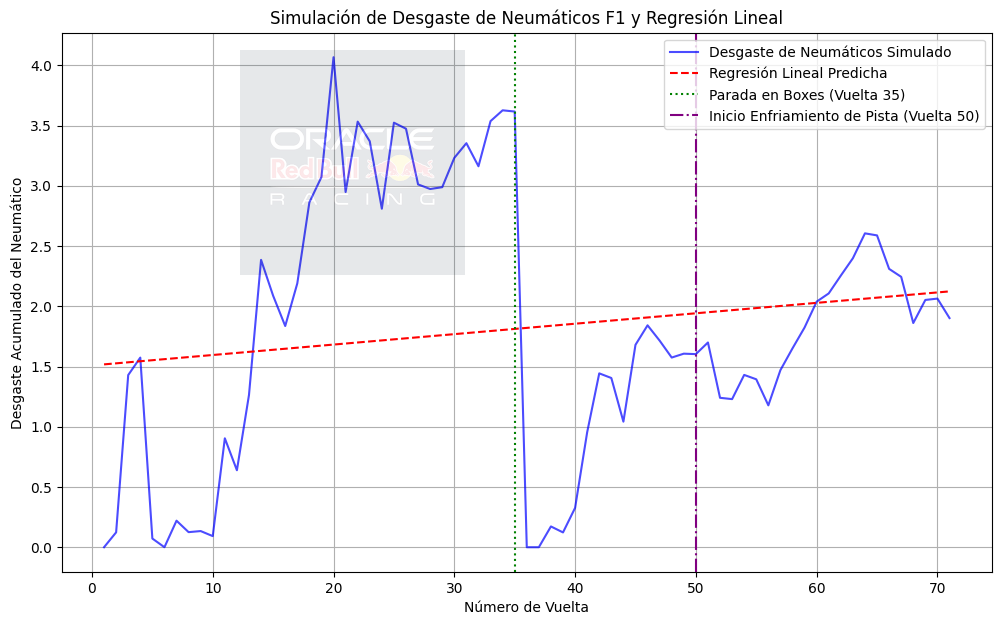

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 7))
plt.plot(laps, tire_wear, label='Desgaste de Neumáticos Simulado', color='blue', alpha=0.7)
plt.plot(laps, y_pred, label='Regresión Lineal Predicha', color='red', linestyle='--')

# Marcar la parada en boxes (vuelta 35 -> índice 34)
plt.axvline(x=35, color='green', linestyle=':', label='Parada en Boxes (Vuelta 35)')

# Marcar el efecto de enfriamiento de la pista (a partir de la vuelta 50)
plt.axvline(x=50, color='purple', linestyle='-.', label='Inicio Enfriamiento de Pista (Vuelta 50)')

# Cargar y añadir logos
try:
    img_redbull = mpimg.imread('redbull_logo.png')
    img_pirelli = mpimg.imread('pirelli_logo.png')

    # Colocar ambos logos en el centro y muy transparentes como fondo
    # Red Bull (ligeramente a la izquierda del centro)
    plt.figimage(img_redbull, 0.20 * plt.gcf().bbox.width, 0.5 * plt.gcf().bbox.height,
                 zorder=1, origin='upper', alpha=0.1) # alpha=0.1 para muy transparente


except FileNotFoundError:
    print("Advertencia: No se encontraron los archivos de logo. Asegúrate de subirlos y verificar las rutas.")
except Exception as e:
    print(f"Ocurrió un error al cargar o mostrar los logos: {e}")

plt.title('Simulación de Desgaste de Neumáticos F1 y Regresión Lineal')
plt.xlabel('Número de Vuelta')
plt.ylabel('Desgaste Acumulado del Neumático')
plt.legend()
plt.grid(True)
plt.show()

## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.

## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.


## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.


## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.


## Discusión del Modelo de Regresión Lineal

El modelo de regresión lineal entrenado arrojó los siguientes parámetros:
- **Intercepto (ordenada al origen):** `1.5090`
- **Coeficiente (pendiente):** `0.0087`

**Interpretación:**

El **intercepto de `1.5090`** representa el desgaste inicial predicho por el modelo en la vuelta 0. Sin embargo, en el contexto de nuestro problema, esto no tiene una interpretación física directa ya que el desgaste comienza en la vuelta 1 y los neumáticos nuevos tienen 0 desgaste. Es un punto de partida matemático para la línea.

El **coeficiente (pendiente) de `0.0087`** indica que, en promedio, por cada vuelta adicional, el modelo predice un aumento de `0.0087` unidades en el desgaste acumulado del neumático. Esta es la tasa de desgaste lineal constante que el modelo ha encontrado.

**Ajuste al Patrón de Desgaste Complejo:**

Como se observa en el gráfico, la regresión lineal (línea roja discontinua) intenta capturar la tendencia general del desgaste simulado (línea azul). Sin embargo, debido a la naturaleza simplificada de un modelo lineal, no puede ajustarse perfectamente a las complejidades introducidas por:

1.  **Cambio de compuesto de neumático:** Los neumáticos medios tienen una tasa de desgaste más alta, mientras que los duros tienen una tasa más baja. El modelo lineal promedia estas tasas.
2.  **Parada en boxes:** La parada en boxes en la vuelta 35 reinicia efectivamente el desgaste a cero para el segundo stint, creando una discontinuidad pronunciada que un modelo lineal no puede modelar.
3.  **Efecto de enfriamiento de la pista:** La reducción en la tasa de desgaste a partir de la vuelta 50 introduce otro cambio en la pendiente que el modelo lineal no puede capturar.

En resumen, la regresión lineal nos da una aproximación global del comportamiento del desgaste, pero no es adecuada para modelar con precisión los patrones de desgaste no lineales y las discontinuidades que se simularon. Para un ajuste más preciso, se necesitarían modelos más avanzados o una regresión por segmentos.


## Summary:

### Q&A
*   **What are the intercept and slope of the trained linear regression model?**
    The linear regression model yielded an intercept of `1.5090` and a slope (coefficient) of `0.0087`.
*   **How well does the linear regression model fit the complex tire wear pattern?**
    The linear regression model provides a general approximation of the tire wear trend but does not accurately capture the complexities of the simulated data due to its simplified linear nature. It struggles with the changes in wear rates from different tire compounds, the abrupt reset of wear after a pit stop, and the reduced wear due to track cooling effects.

### Data Analysis Key Findings
*   Synthetic tire wear data for 71 laps was successfully generated, simulating F1 race conditions. This included:
    *   Medium tire performance for the first 35 laps, followed by hard tire performance for the remaining 36 laps.
    *   A pit stop at lap 35, effectively resetting the accumulated wear for the new hard tires.
    *   A track cooling effect from lap 50 onwards, reducing the wear increment by 30% (cooling factor of 0.7).
*   A linear regression model was trained to predict tire wear based on lap number, resulting in an intercept of `1.5090` and a slope (coefficient) of `0.0087`. The slope indicates an average increase of `0.0087` units in cumulative tire wear per lap.
*   The visualization clearly showed that while the linear regression model captured a general upward trend, it failed to accurately represent the specific events like the pit stop (discontinuity) and the changes in wear rate due to different tire compounds and track cooling.

### Insights or Next Steps
*   For a more accurate prediction of complex tire wear patterns, consider implementing advanced modeling techniques such as segmented regression or non-linear models that can account for discontinuities (like pit stops) and varying rates of change (tire compounds, track cooling).
*   Future analysis could explore incorporating additional features into the model, such as tire compound type, a binary variable for pit stops, and a categorical variable for track conditions (e.g., normal, cooling), to improve its explanatory power and predictive accuracy.
